In [1]:
import torch
import math

def positional_encoding(max_len, d_model):
    pe = torch.zeros(max_len, d_model)

    position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

    pe[:, 0::2] = torch.sin(position * div_term)  # 偶数次元にsin
    pe[:, 1::2] = torch.cos(position * div_term)  # 奇数次元にcos

    return pe

# 例: 最大50単語、埋め込み次元512
pe = positional_encoding(50, 512)
print(pe.shape)  # torch.Size([50, 512])


torch.Size([50, 512])


In [4]:
x_original = torch.randn(1, 50, 512)  # (batch, seq_len, d_model)
pe = positional_encoding(50, 512)

x = x_original + pe[:x_original.size(1)]

In [10]:
pe.shape

torch.Size([50, 512])

In [5]:
x_original

tensor([[[ 0.9402, -0.4380, -0.7904,  ...,  0.7016, -1.0706, -0.5488],
         [-0.4524, -0.4902, -0.7554,  ..., -0.5614,  0.3480, -0.4163],
         [ 0.8449, -1.1463, -0.8973,  ...,  1.5655, -1.3162, -0.0817],
         ...,
         [ 0.1332,  0.9193,  0.8634,  ...,  1.1802, -0.2592,  0.5612],
         [-1.6944, -0.1080,  0.3050,  ...,  1.7602,  0.1750, -0.0308],
         [-0.0787,  1.1031, -0.6595,  ..., -0.9282, -1.5672,  0.6095]]])

In [9]:
x_original.shape

torch.Size([1, 50, 512])

In [6]:
x

tensor([[[ 0.9402,  0.5620, -0.7904,  ...,  1.7016, -1.0706,  0.4512],
         [ 0.3891,  0.0501,  0.0665,  ...,  0.4386,  0.3481,  0.5837],
         [ 1.7542, -1.5624,  0.0391,  ...,  2.5655, -1.3160,  0.9183],
         ...,
         [ 0.2567, -0.0731,  1.8405,  ...,  2.1802, -0.2543,  1.5612],
         [-2.4626, -0.7481,  1.0362,  ...,  2.7602,  0.1800,  0.9691],
         [-1.0325,  1.4037, -0.8035,  ...,  0.0718, -1.5621,  1.6095]]])

In [8]:
x.shape

torch.Size([1, 50, 512])

In [11]:
x = x.numpy()

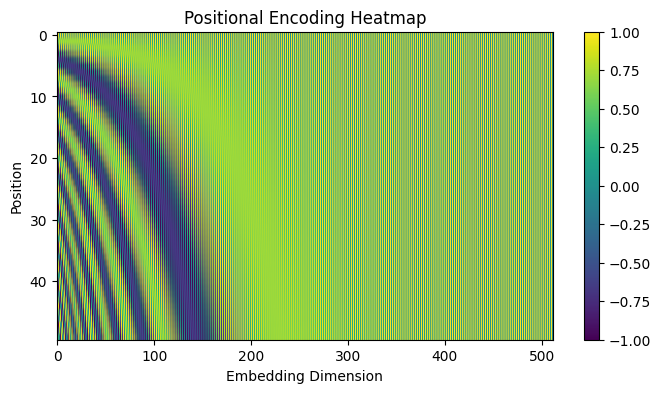

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Positional Encoding ----
def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]        # (seq_len, 1)
    dim = np.arange(d_model)[np.newaxis, :]        # (1, d_model)

    angle_rates = 1 / np.power(10000, (2 * (dim//2)) / np.float32(d_model))
    angle_rads = pos * angle_rates

    pe = np.zeros((seq_len, d_model))
    pe[:, 0::2] = np.sin(angle_rads[:, 0::2])      # even dims: sin
    pe[:, 1::2] = np.cos(angle_rads[:, 1::2])      # odd dims: cos
    return pe


# ---- Heatmap Visualization ----
plt.figure(figsize=(8, 4))
plt.imshow(pe, aspect='auto')
plt.title("Positional Encoding Heatmap")
plt.xlabel("Embedding Dimension")
plt.ylabel("Position")
plt.colorbar()
plt.show()
